In [1]:
# !virtualenv myenv


In [2]:
# !.\myenv\Scripts\activate

In [3]:
# !python --version

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import cv2
import numpy as np

In [5]:
!pip install --user mediapipe


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load Dataset

In [6]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")


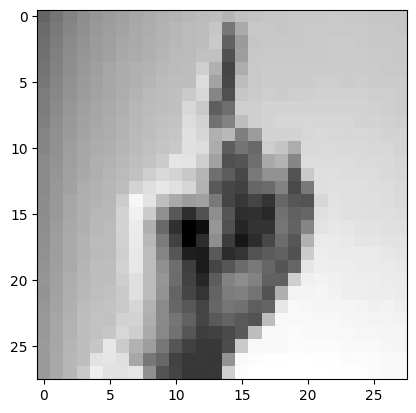

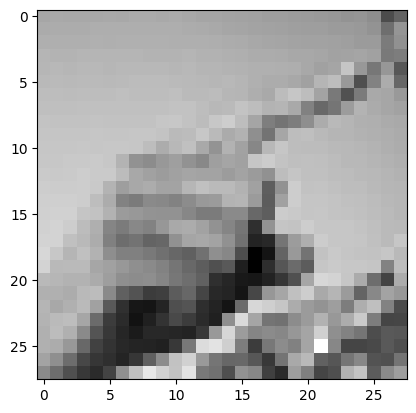

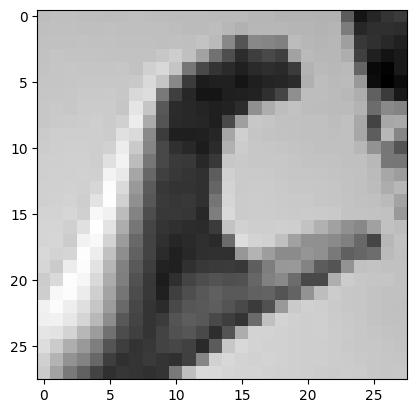

In [7]:
pixel_columns = train_df.columns[1:]
count=0
for index, row in train_df.iterrows():
    pixel_val = row[pixel_columns].values.astype(np.uint8)
    image_size = int(np.sqrt(len(pixel_val)))
    img = pixel_val.reshape((image_size, image_size))
    plt.imshow(img, cmap='gray')
    plt.show()
    count += 1
    if count >= 3:
        break

In [8]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [9]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

#### Prepare training and testing dataset

In [10]:
x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(x_train)

### Prepare and train the model

In [12]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

In [13]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test))

model.save('smnist.h5')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        

C:\Users\CHINMOY\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# !pip3 install protobuf==3.20.3

In [15]:
# !pip3 install --user mediapipe

In [16]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time

In [17]:
model = load_model('smnist.h5')

# mphands = mp.solutions.hands
# hands = mphands.Hands()
# mp_drawing = mp.solutions.drawing_utils

# cap = cv2.VideoCapture(0)

# _, frame = cap.read()
# h, w, c = frame.shape
# img_counter = 0
# analysisframe = ''
# letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
# while True:
#     _, frame = cap.read()
    
#     k = cv2.waitKey(1)
#     if k%256 == 27:
#         # ESC pressed
#         print("Escape hit, closing...")
#         break
#     elif k%256 == 32:
#         # SPACE pressed
#         # SPACE pressed
#         analysisframe = frame
#         showframe = analysisframe
#         cv2.imshow("Frame", showframe)
#         framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
#         resultanalysis = hands.process(framergbanalysis)
#         hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
#         if hand_landmarksanalysis:
#             for handLMsanalysis in hand_landmarksanalysis:
#                 x_max = 0
#                 y_max = 0
#                 x_min = w
#                 y_min = h
#                 for lmanalysis in handLMsanalysis.landmark:
#                     x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
#                     if x > x_max:
#                         x_max = x
#                     if x < x_min:
#                         x_min = x
#                     if y > y_max:
#                         y_max = y
#                     if y < y_min:
#                         y_min = y
#                 y_min -= 20
#                 y_max += 20
#                 x_min -= 20
#                 x_max += 20 

#         analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
#         analysisframe = analysisframe[y_min:y_max, x_min:x_max]
#         analysisframe = cv2.resize(analysisframe,(28,28))


#         nlist = []
#         rows,cols = analysisframe.shape
#         for i in range(rows):
#             for j in range(cols):
#                 k = analysisframe[i,j]
#                 nlist.append(k)
        
#         datan = pd.DataFrame(nlist).T
#         colname = []
#         for val in range(784):
#             colname.append(val)
#         datan.columns = colname

#         pixeldata = datan.values
#         pixeldata = pixeldata / 255
#         pixeldata = pixeldata.reshape(-1,28,28,1)
#         prediction = model.predict(pixeldata)
#         predarray = np.array(prediction[0])
#         letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
#         predarrayordered = sorted(predarray, reverse=True)
#         high1 = predarrayordered[0]
#         high2 = predarrayordered[1]
#         high3 = predarrayordered[2]
#         for key,value in letter_prediction_dict.items():
#             if value==high1:
#                 print("Predicted Character 1: ", key)
#                 print('Confidence 1: ', 100*value)
#             elif value==high2:
#                 print("Predicted Character 2: ", key)
#                 print('Confidence 2: ', 100*value)
#             elif value==high3:
#                 print("Predicted Character 3: ", key)
#                 print('Confidence 3: ', 100*value)
#         time.sleep(5)

#     framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     result = hands.process(framergb)
#     hand_landmarks = result.multi_hand_landmarks
#     if hand_landmarks:
#         for handLMs in hand_landmarks:
#             x_max = 0
#             y_max = 0
#             x_min = w
#             y_min = h
#             for lm in handLMs.landmark:
#                 x, y = int(lm.x * w), int(lm.y * h)
#                 if x > x_max:
#                     x_max = x
#                 if x < x_min:
#                     x_min = x
#                 if y > y_max:
#                     y_max = y
#                 if y < y_min:
#                     y_min = y
#             y_min -= 20
#             y_max += 20
#             x_min -= 20
#             x_max += 20
#             cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
#     cv2.imshow("Frame", frame)

# cap.release()
# cv2.destroyAllWindows()

In [18]:


# # Initialize MediaPipe Hands
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands()
# mp_drawing = mp.solutions.drawing_utils

# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to grab frame")
#         break

#     # Convert the BGR image to RGB
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

#     # Use MediaPipe Hands to detect hands in the frame
#     results = hands.process(rgb_frame)

#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:
#             # Draw landmarks on the hand
#             mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

#             # Extract the bounding box around the hand
#             bbox_coor = [int(min(hand_landmarks.landmark, key=lambda x: x.x).x * frame.shape[1]),
#                          int(min(hand_landmarks.landmark, key=lambda x: x.y).y * frame.shape[0]),
#                          int(max(hand_landmarks.landmark, key=lambda x: x.x).x * frame.shape[1]),
#                          int(max(hand_landmarks.landmark, key=lambda x: x.y).y * frame.shape[0])]

#             # Preprocess the hand region for your model
#             hand_img = frame[bbox_coor[1]:bbox_coor[3], bbox_coor[0]:bbox_coor[2]]
#             hand_img = cv2.resize(hand_img, (28, 28))
#             hand_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
#             hand_img = hand_img / 255.0
#             hand_img = np.expand_dims(hand_img, axis=(0, -1))

#             # Make prediction
#             prediction = model.predict(hand_img)
#             predicted_class = np.argmax(prediction)

#             # Display predicted letter next to the hand bounding box
#             cv2.putText(frame, f'Prediction: {chr(ord("A") + predicted_class)}', (bbox_coor[0], bbox_coor[1] - 20),
#                         cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

#     cv2.imshow("Frame", frame)

#     if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit
#         break

# cap.release()
# cv2.destroyAllWindows()


### Live webcam detection

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model
# model = tf.keras.models.load_model('your_model_path')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Preprocess the frame for your model
    img = cv2.resize(frame, (28, 28))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = np.expand_dims(img, axis=(0, -1))

    # Make prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Hand detection using contour detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 4500:  # Adjust this value based on your hand size
            x, y, w, h = cv2.boundingRect(contour)

            # Filter out small contours
            if w * h > 500:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # Display predicted letter next to the hand bounding box
                cv2.putText(frame, f'Prediction: {chr(ord("A") + predicted_class)}', (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow("Frame", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


In [ ]:
# import cv2
# import numpy as np
# import tensorflow as tf

# # Load your trained model
# # model = tf.keras.models.load_model('your_model_path')

# # Specify the full path to the Haarcascade XML file for hand detection
# hand_cascade_path = 'Hand.Cascade.1.xml'

# # Load the Haarcascades for hand detection
# hand_cascade = cv2.CascadeClassifier(hand_cascade_path)

# cap = cv2.VideoCapture(0)

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("Failed to grab frame")
#         break

#     # Convert the BGR image to grayscale
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect hands in the frame
#     hands = hand_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(50, 50))

#     for (x, y, w, h) in hands:
#         # Draw a rectangle around the detected hand
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

#         # Preprocess the hand region for your model
#         hand_img = frame[y:y + h, x:x + w]
#         hand_img = cv2.resize(hand_img, (28, 28))
#         hand_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
#         hand_img = hand_img / 255.0
#         hand_img = np.expand_dims(hand_img, axis=(0, -1))

#         # Make prediction
#         prediction = model.predict(hand_img)
#         predicted_class = np.argmax(prediction)

#         # Display predicted letter next to the hand bounding box
#         cv2.putText(frame, f'Prediction: {chr(ord("A") + predicted_class)}', (x, y - 20),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

#     cv2.imshow("Frame", frame)

#     if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit
#         break

# cap.release()
# cv2.destroyAllWindows()
